In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

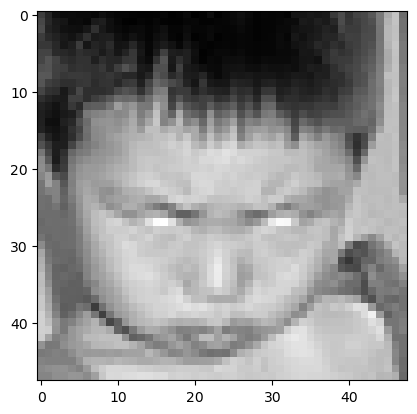

(48, 48)


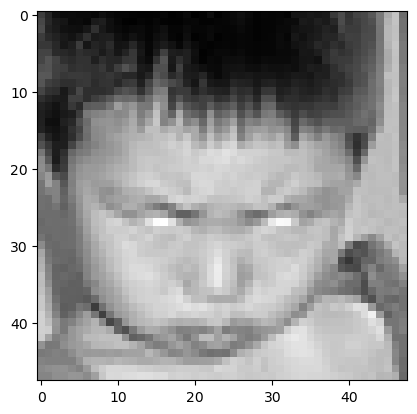

<class 'numpy.ndarray'>


In [2]:
DATADIR = "train"
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
IMG_SIZE = 48

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #print(new_array, class_num)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()      


import random

random.shuffle(training_data)


x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
print(type(y))

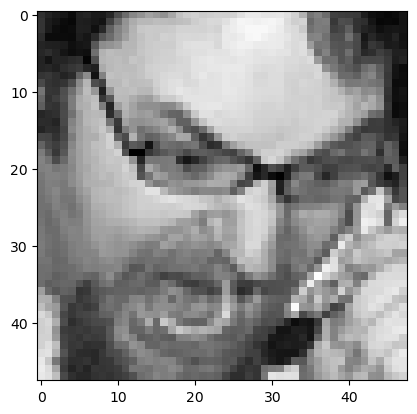

(48, 48)


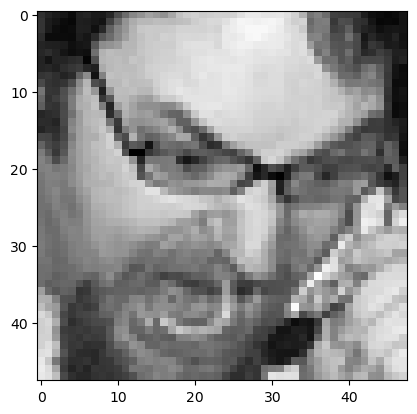

In [3]:
DATA = "test"
CATEGO = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
for category in CATEGO:
    path = os.path.join(DATA, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array.shape)
SIZE = 48

new_array = cv2.resize(img_array, (SIZE, SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

testing_data = []

def create_testing_data():
    for category in CATEGO:
        path = os.path.join(DATA, category)
        class_num = CATEGO.index(category)
        #print(class_num, " + ",category)
        #print(type(class_num), " + ",type(category))
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (SIZE, SIZE))
                #print(new_array, class_num)
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_testing_data()      


import random

random.shuffle(training_data)


x_test = []
y_test = []

for features, label in training_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y)

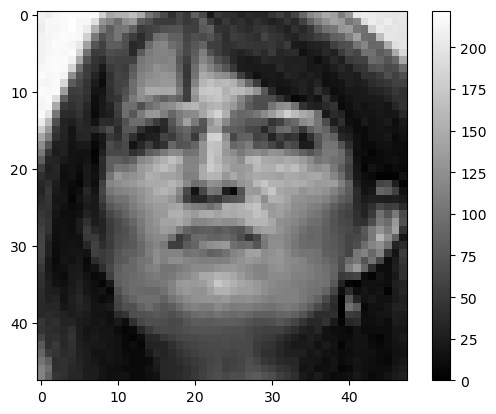

In [4]:
plt.figure()
plt.imshow(x[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

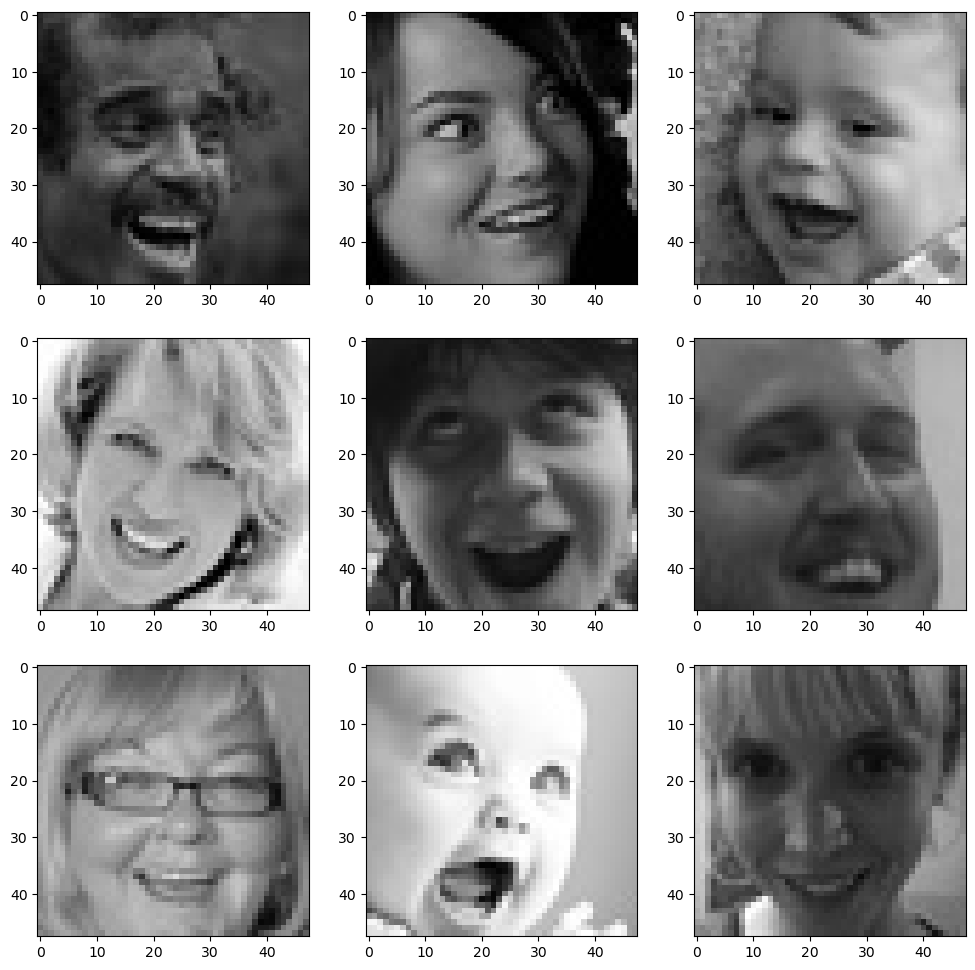

In [5]:
expression = 'happy'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR + '/' + expression + '/' + os.listdir(DATADIR + '/' + expression)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

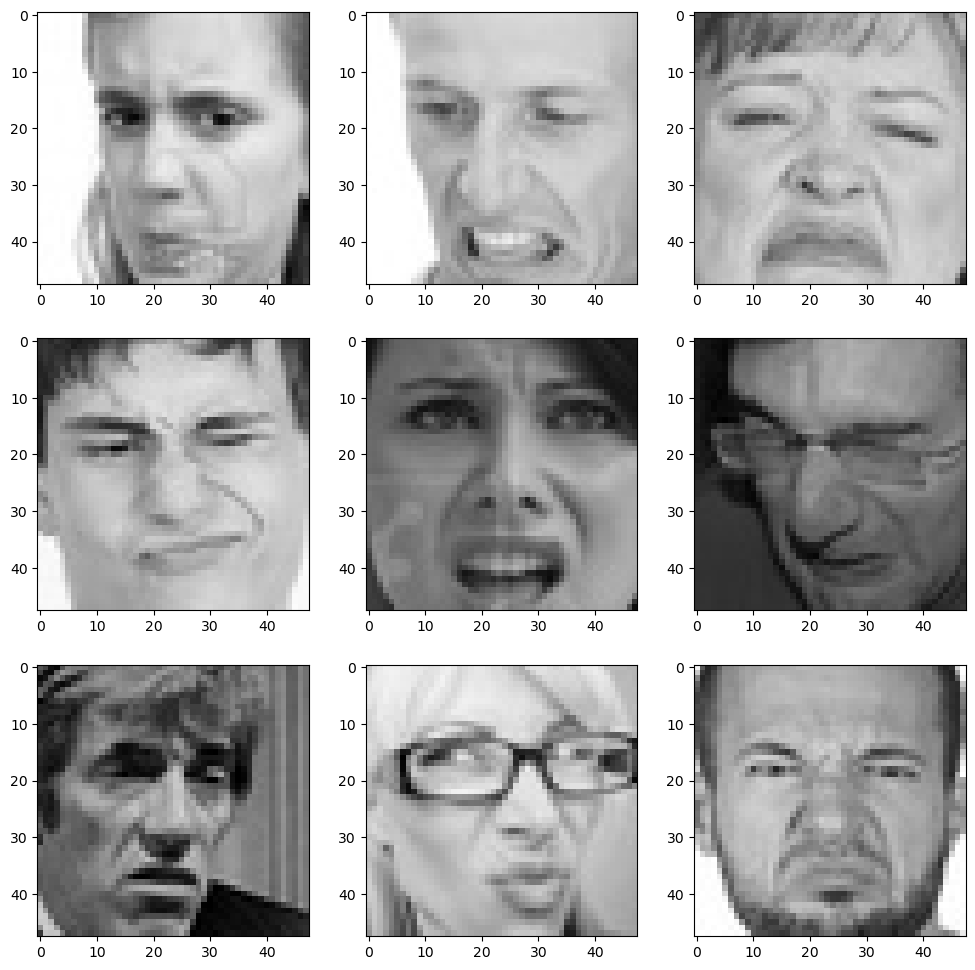

In [6]:
expression = 'disgust'

plt.figure(figsize = (12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(DATADIR + '/' + expression + '/' + os.listdir(DATADIR + '/' + expression)[i], target_size = (IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
plt.show()

In [42]:
print(x.shape)
print(y.shape)
print(x_test.shape)
print(y_test.shape)

(28709, 48, 48, 1)
(28709,)
(5742, 48, 48, 1)
(5742,)


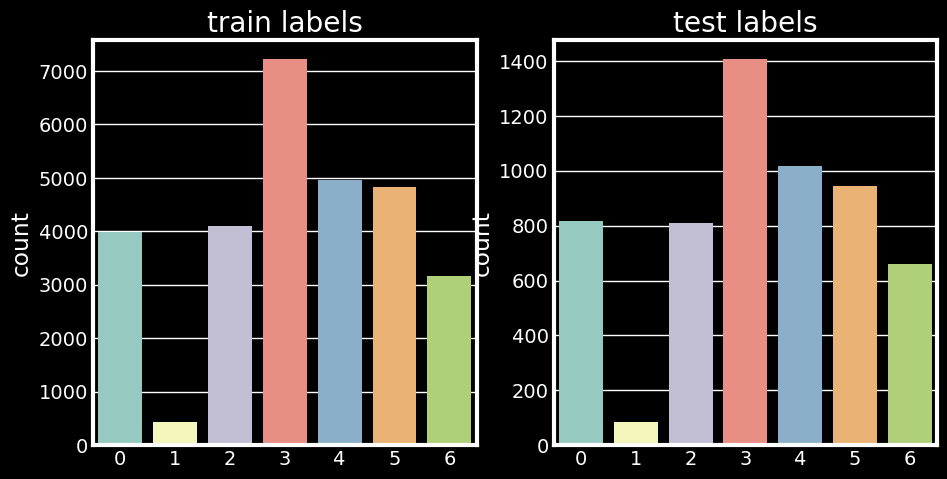

In [40]:
import seaborn as sns
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([y , y_test] , ['train labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [7]:
x=x/255.0
model = Sequential()
model.add(Flatten(input_shape=(IMG_SIZE, IMG_SIZE)))
model.add(Dense(512, activation=tf.nn.relu))
#model.add(Dense(256, activation='sigmoid'))
model.add(Dense(512, activation='relu')) 
model.add(Dense(14, activation=tf.nn.softmax))
#print (model.summary())
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 14)                7182      
                                                                 
Total params: 1,449,998
Trainable params: 1,449,998
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x ,y ,batch_size = 128, epochs=300, validation_data=(x,y))

Epoch 1/300
225/225 [==============================] - 14s 63ms/step - loss: 1.0949 - accuracy: 0.5914 - val_loss: 1.0495 - val_accuracy: 0.6116
Epoch 2/300
225/225 [==============================] - 14s 63ms/step - loss: 1.0669 - accuracy: 0.6043 - val_loss: 1.1285 - val_accuracy: 0.5809
Epoch 3/300
225/225 [==============================] - 15s 67ms/step - loss: 1.0460 - accuracy: 0.6123 - val_loss: 1.0242 - val_accuracy: 0.6190
Epoch 4/300
225/225 [==============================] - 13s 60ms/step - loss: 1.0206 - accuracy: 0.6245 - val_loss: 1.0832 - val_accuracy: 0.6020
Epoch 5/300
225/225 [==============================] - 13s 59ms/step - loss: 1.0014 - accuracy: 0.6307 - val_loss: 1.0057 - val_accuracy: 0.6297
Epoch 6/300
225/225 [==============================] - 13s 60ms/step - loss: 0.9755 - accuracy: 0.6430 - val_loss: 0.9407 - val_accuracy: 0.6589
Epoch 7/300
225/225 [==============================] - 12s 56ms/step - loss: 0.9558 - accuracy: 0.6535 - val_loss: 0.9998 - val_ac

225/225 [==============================] - 15s 68ms/step - loss: 0.2886 - accuracy: 0.9008 - val_loss: 0.2892 - val_accuracy: 0.9023
Epoch 58/300
225/225 [==============================] - 15s 66ms/step - loss: 0.2836 - accuracy: 0.9052 - val_loss: 0.3792 - val_accuracy: 0.8615
Epoch 59/300
225/225 [==============================] - 15s 64ms/step - loss: 0.2764 - accuracy: 0.9071 - val_loss: 0.2722 - val_accuracy: 0.9103
Epoch 60/300
225/225 [==============================] - 15s 65ms/step - loss: 0.2785 - accuracy: 0.9056 - val_loss: 0.3278 - val_accuracy: 0.8800
Epoch 61/300
225/225 [==============================] - 18s 79ms/step - loss: 0.2800 - accuracy: 0.9044 - val_loss: 0.2922 - val_accuracy: 0.8973
Epoch 62/300
225/225 [==============================] - 16s 73ms/step - loss: 0.2714 - accuracy: 0.9084 - val_loss: 0.4056 - val_accuracy: 0.8541
Epoch 63/300
225/225 [==============================] - 15s 66ms/step - loss: 0.2666 - accuracy: 0.9108 - val_loss: 0.3187 - val_accuracy

225/225 [==============================] - 15s 66ms/step - loss: 0.1339 - accuracy: 0.9559 - val_loss: 0.2884 - val_accuracy: 0.9002
Epoch 114/300
225/225 [==============================] - 15s 67ms/step - loss: 0.1445 - accuracy: 0.9526 - val_loss: 0.2327 - val_accuracy: 0.9169
Epoch 115/300
225/225 [==============================] - 15s 68ms/step - loss: 0.1451 - accuracy: 0.9509 - val_loss: 0.2805 - val_accuracy: 0.8996
Epoch 116/300
225/225 [==============================] - 16s 70ms/step - loss: 0.1652 - accuracy: 0.9417 - val_loss: 0.1205 - val_accuracy: 0.9628
Epoch 117/300
225/225 [==============================] - 14s 63ms/step - loss: 0.1177 - accuracy: 0.9607 - val_loss: 0.2707 - val_accuracy: 0.9077
Epoch 118/300
225/225 [==============================] - 14s 61ms/step - loss: 0.1479 - accuracy: 0.9499 - val_loss: 0.2824 - val_accuracy: 0.9022
Epoch 119/300
225/225 [==============================] - 15s 67ms/step - loss: 0.1307 - accuracy: 0.9579 - val_loss: 0.2544 - val_ac

Epoch 169/300
225/225 [==============================] - 15s 66ms/step - loss: 0.1152 - accuracy: 0.9621 - val_loss: 0.1683 - val_accuracy: 0.9432
Epoch 170/300
225/225 [==============================] - 15s 67ms/step - loss: 0.1126 - accuracy: 0.9627 - val_loss: 0.0927 - val_accuracy: 0.9701
Epoch 171/300
225/225 [==============================] - 15s 66ms/step - loss: 0.0943 - accuracy: 0.9691 - val_loss: 0.1403 - val_accuracy: 0.9528
Epoch 172/300
225/225 [==============================] - 14s 64ms/step - loss: 0.1045 - accuracy: 0.9662 - val_loss: 0.1974 - val_accuracy: 0.9330
Epoch 173/300
225/225 [==============================] - 16s 73ms/step - loss: 0.0986 - accuracy: 0.9670 - val_loss: 0.1237 - val_accuracy: 0.9581
Epoch 174/300
225/225 [==============================] - 21s 92ms/step - loss: 0.0816 - accuracy: 0.9740 - val_loss: 0.0809 - val_accuracy: 0.9733
Epoch 175/300
225/225 [==============================] - 16s 73ms/step - loss: 0.1375 - accuracy: 0.9544 - val_loss: 0

Epoch 225/300
225/225 [==============================] - 14s 62ms/step - loss: 0.1034 - accuracy: 0.9647 - val_loss: 0.1154 - val_accuracy: 0.9634
Epoch 226/300
225/225 [==============================] - 14s 62ms/step - loss: 0.1066 - accuracy: 0.9654 - val_loss: 0.0964 - val_accuracy: 0.9665
Epoch 227/300
225/225 [==============================] - 14s 62ms/step - loss: 0.0915 - accuracy: 0.9698 - val_loss: 0.2321 - val_accuracy: 0.9284
Epoch 228/300
225/225 [==============================] - 14s 61ms/step - loss: 0.1350 - accuracy: 0.9568 - val_loss: 0.1421 - val_accuracy: 0.9502
Epoch 229/300
225/225 [==============================] - 14s 63ms/step - loss: 0.0940 - accuracy: 0.9701 - val_loss: 0.0852 - val_accuracy: 0.9706
Epoch 230/300
225/225 [==============================] - 14s 62ms/step - loss: 0.1008 - accuracy: 0.9683 - val_loss: 0.0894 - val_accuracy: 0.9688
Epoch 231/300
225/225 [==============================] - 14s 62ms/step - loss: 0.0839 - accuracy: 0.9722 - val_loss: 0

Epoch 281/300
225/225 [==============================] - 16s 69ms/step - loss: 0.0928 - accuracy: 0.9711 - val_loss: 0.1270 - val_accuracy: 0.9577
Epoch 282/300
225/225 [==============================] - 15s 67ms/step - loss: 0.0952 - accuracy: 0.9700 - val_loss: 0.0998 - val_accuracy: 0.9661
Epoch 283/300
225/225 [==============================] - 15s 66ms/step - loss: 0.0735 - accuracy: 0.9766 - val_loss: 0.1358 - val_accuracy: 0.9574
Epoch 284/300
225/225 [==============================] - 14s 62ms/step - loss: 0.1039 - accuracy: 0.9676 - val_loss: 0.2779 - val_accuracy: 0.9193
Epoch 285/300
225/225 [==============================] - 14s 63ms/step - loss: 0.1074 - accuracy: 0.9664 - val_loss: 0.1284 - val_accuracy: 0.9596
Epoch 286/300
225/225 [==============================] - 14s 63ms/step - loss: 0.0953 - accuracy: 0.9698 - val_loss: 0.0868 - val_accuracy: 0.9712
Epoch 287/300
225/225 [==============================] - 14s 64ms/step - loss: 0.0623 - accuracy: 0.9804 - val_loss: 0

In [25]:
results = model.evaluate(x_test,y_test)
preds   = model.predict(x_test)

180/180 [==============================] - 2s 7ms/step


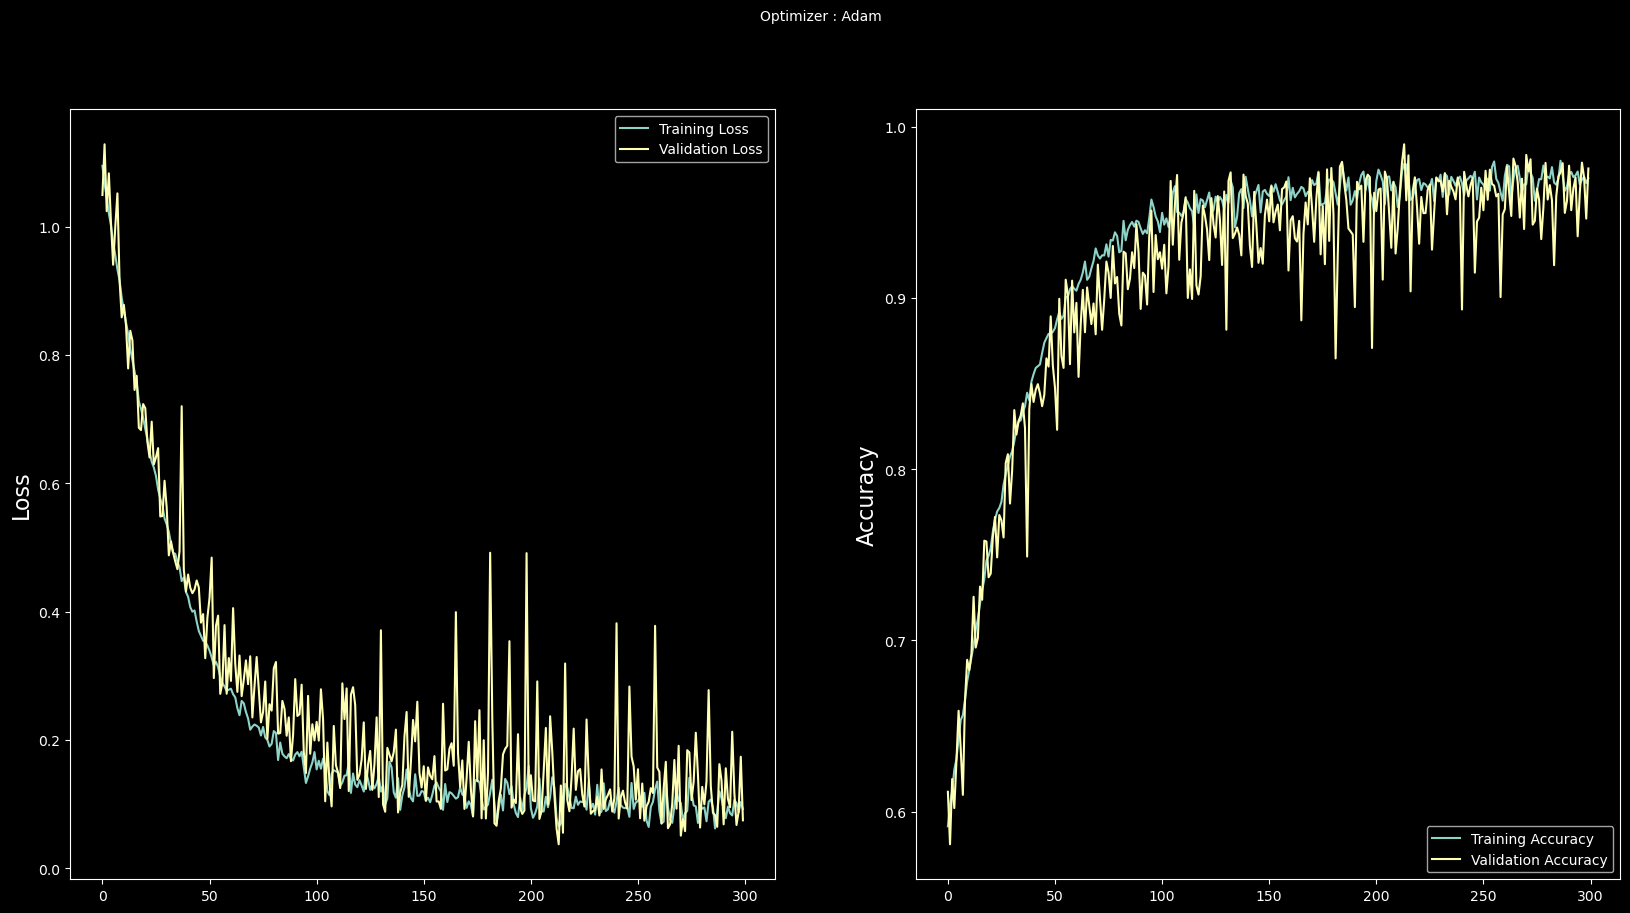

In [20]:
plt.style.use('dark_background')

plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [26]:
results = model.evaluate(x_test, y_test)
preds   = model.predict(x_test)
print('The current model achieved a categorical accuracy of {}%!'.format(round(results[1]*100,2)))

180/180 [==============================] - 1s 6ms/step
The current model achieved a categorical accuracy of 97.37%!


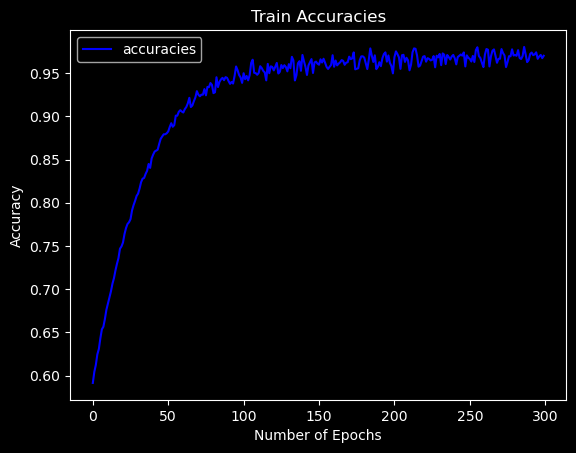

In [27]:

plt.plot(history.history['accuracy'], color='b', label="accuracies")
plt.title("Train Accuracies")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

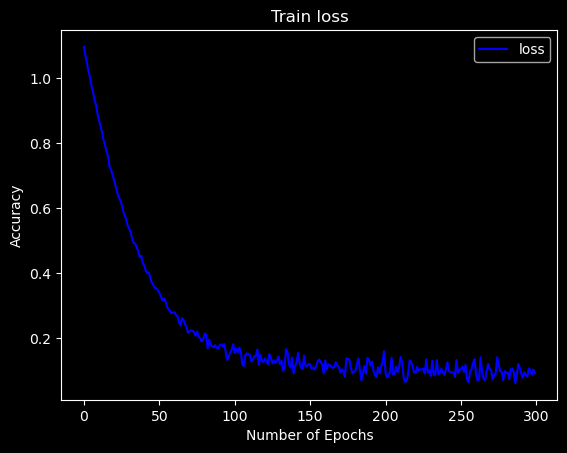

In [28]:
plt.plot(history.history['loss'], color='b', label="loss")
plt.title("Train loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


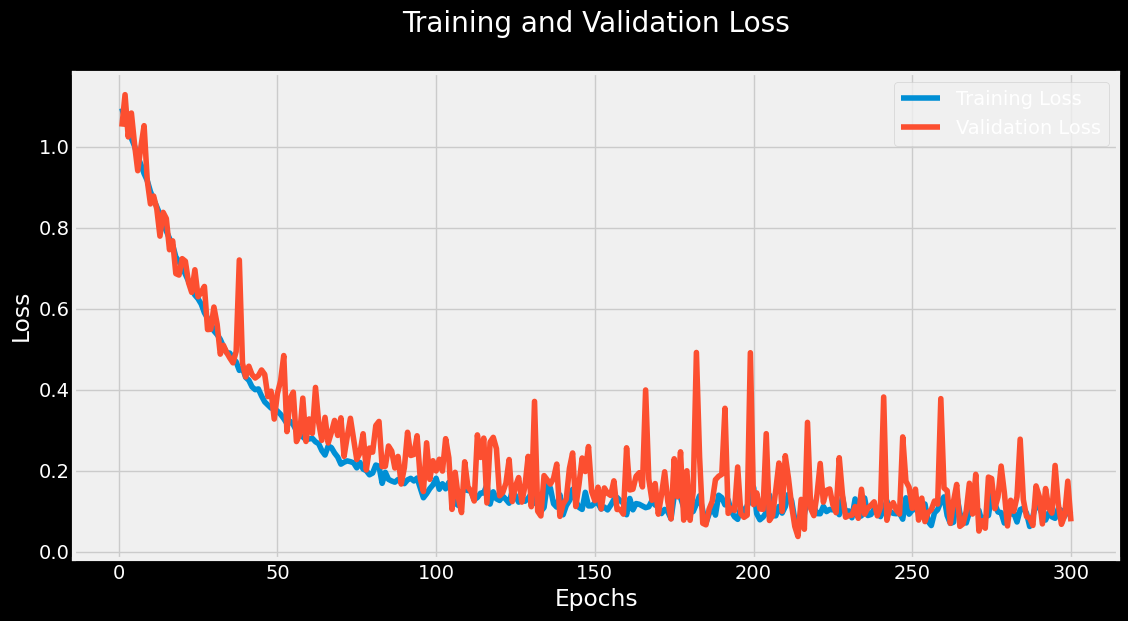

In [31]:
import seaborn as sns
plt.style.use('dark_background')
plt.figure(figsize = (12, 6))
plt.style.use('fivethirtyeight')

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(1, 301)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


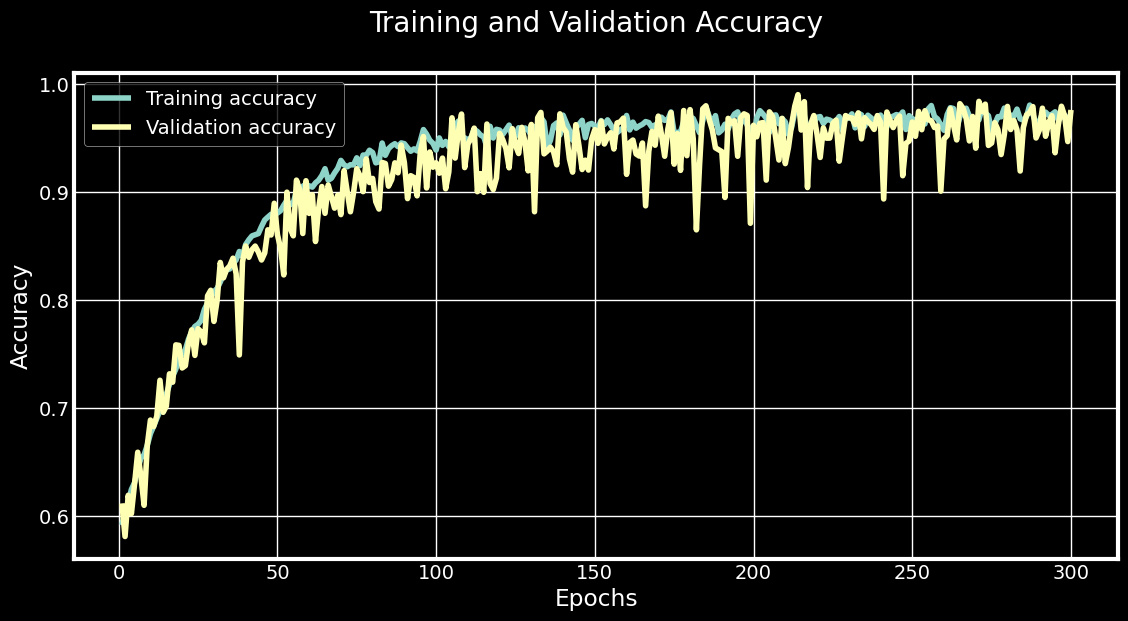

In [33]:
plt.figure(figsize = (12, 6))
#plt.style.use('dark_background')
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy'] 
epoch = range(1, 301)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()
     

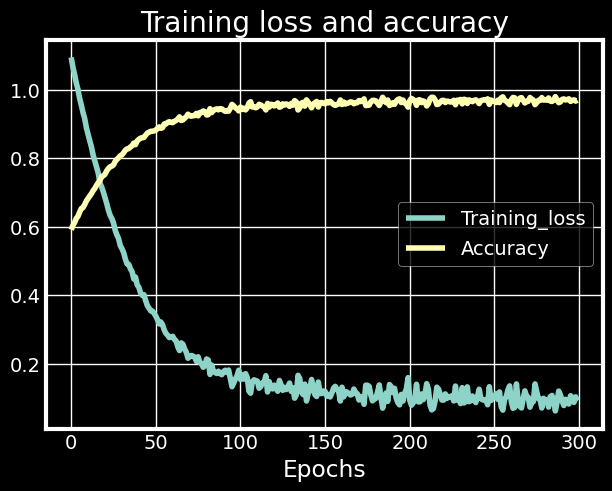

In [34]:
N=300 #epoch
plt.plot(np.arange(0,N),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,N),history.history['accuracy'],label='Accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

In [35]:
predictions = model.predict(x_test)
y_pred = [np.argmax(probas) for probas in predictions]

180/180 [==============================] - 1s 6ms/step


In [36]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<Figure size 640x480 with 0 Axes>

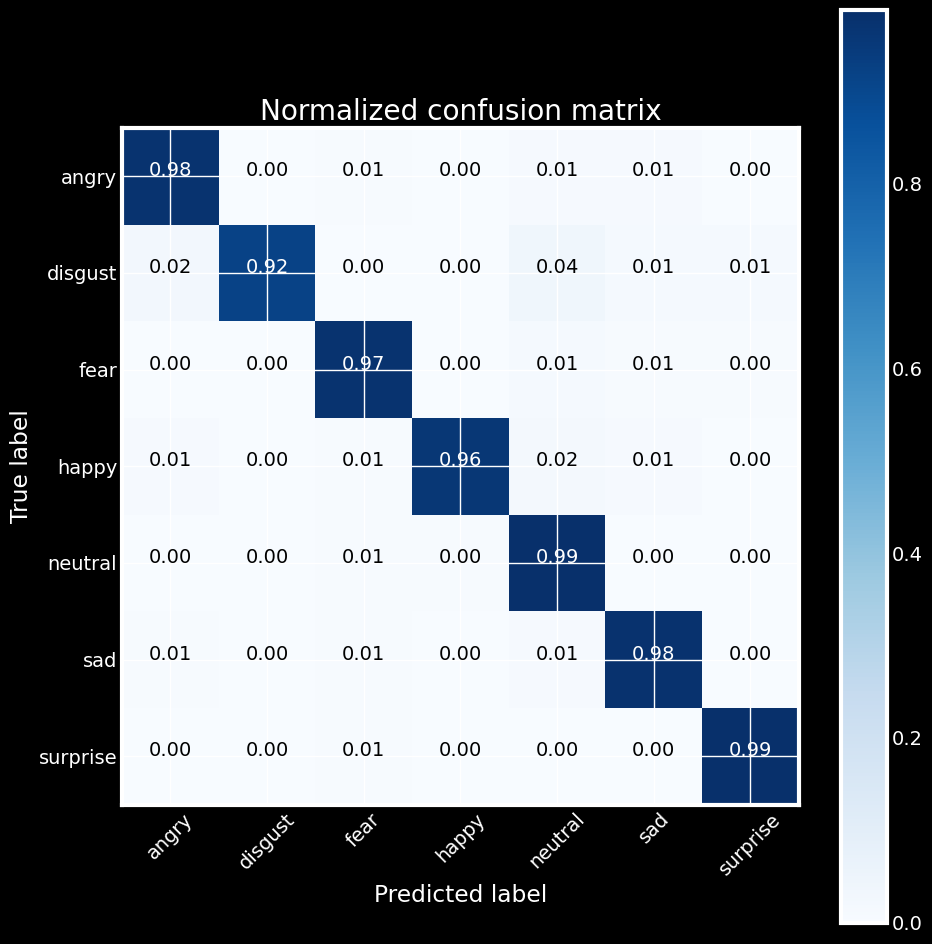

In [37]:
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CATEGORIES, title='Normalized confusion matrix')
plt.show()

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("accuracy =:    " ,format(round(acc[-1]*100,2)))
print("val_accuracy =:" ,format(round(val_acc[-1]*100,2)))
print("loss =:        " ,format(round(loss[-1]*100,2)))
print("val_loss =:    " ,format(round(val_loss[-1]*100,2)))

accuracy =:     97.01
val_accuracy =: 97.59
loss =:         9.25
val_loss =:     7.49


ROC AUC score: 0.9816466460818456


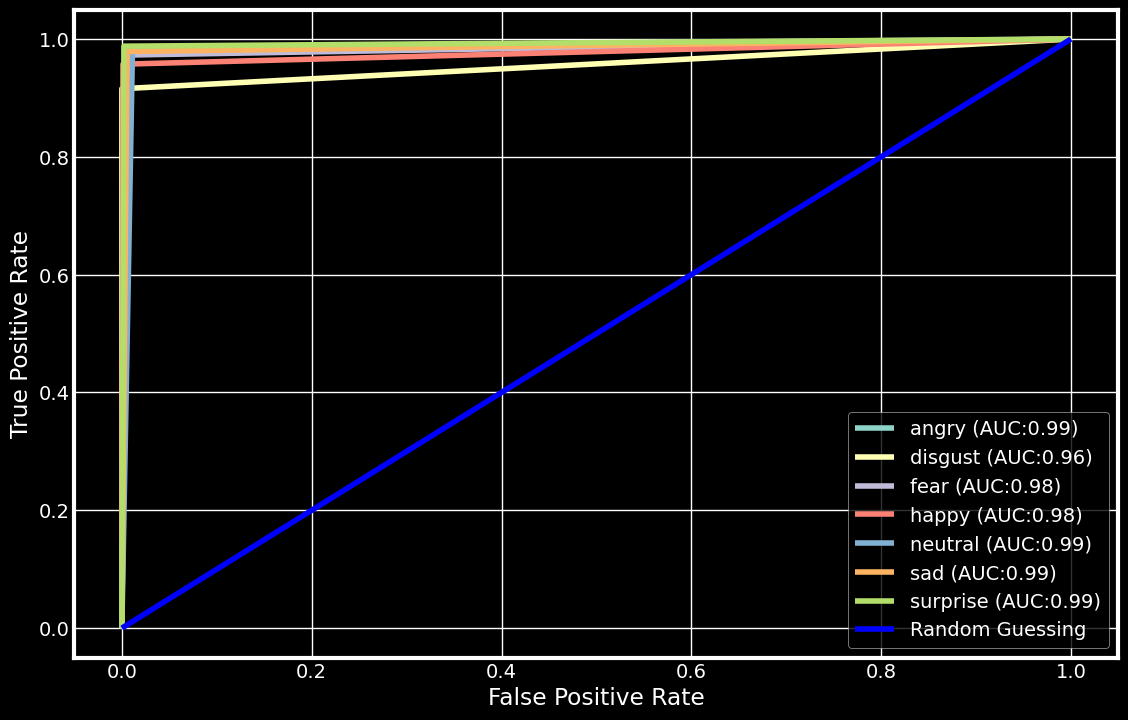

In [39]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(CATEGORIES):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [41]:
model.save("new.model")

INFO:tensorflow:Assets written to: new.model\assets


INFO:tensorflow:Assets written to: new.model\assets


In [21]:
def prepare(filepath):
    IMG_SIZ=48
    im=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_img=cv2.resize(im,(IMG_SIZ,IMG_SIZ))
    return new_img

In [22]:
prediction=model.predict(np.array([prepare("test/sad/PrivateTest_552501.jpg")]))

1/1 [==============================] - 0s 133ms/step


In [23]:
prediction

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [24]:
if prediction[0][0]==1:
    print("this image for: Angry")
if prediction[0][1]==1:
    print("this image for: Disgust")
if prediction[0][2]==1:
    print("this image for: Fear")
if prediction[0][3]==1:
    print("this image for: Happy")
if prediction[0][4]==1:
    print("this image for: Neutral")    
if prediction[0][5]==1:
    print("this image for: Sad")
if prediction[0][6]==1:
    print("this image for: Surprise")

this image for: Surprise
